In [6]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
%run analise.py

In [7]:
def z_mod(x, media,mad):
    m = (x - media) * 0.6745
    z_md = abs(m/mad)
    return float(z_md)

df = pd.read_csv("../data/logs2.csv",sep = ";")
ajeitando_df(df).head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


# Identificando outliers e plotando kmeans

In [8]:
# Criando um data frame apenas com os acessos
df_acessos = df[["usuario"]].apply(pd.value_counts)
df_acessos.columns = ["acessos"]
df_acessos.head()

,acessos
616329888599911591,5198
3952875937242617029,5089
-8964805488632447931,4513
710203151364569887,4428
260012301744219973,4043


In [9]:
# Coletando dados estatísticos do data frame dos acessos
df_acessos.describe()

,acessos
count,995.000000
mean,414.371859
std,640.225118
min,1.000000
25%,37.000000
50%,184.000000
75%,503.500000
max,5198.000000


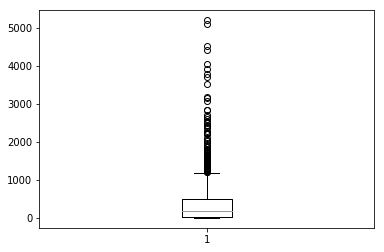

In [10]:
# Plotando o boxplot dos acessos
plt.boxplot(df_acessos["acessos"])
plt.show()

## Identificando possíveis outliers

In [11]:
media_acessos = df_acessos["acessos"].mean()
media_acessos

414.3718592964824

In [12]:
mediana_acessos = df_acessos["acessos"].median()
mediana_acessos

184.0

In [13]:
df_acessos["x-mediana"] = df_acessos["acessos"].apply(lambda x: abs(int(x) - mediana_acessos))
df_acessos.sort_values(by=['x-mediana'])

,acessos,x-mediana
-224930710256020865,184,0.0
-6836071898683336601,185,1.0
-2121805090545450681,185,1.0
-1059446735651333741,181,3.0
-4821534548982177369,181,3.0
-4015152259331783011,181,3.0
391057645280711829,180,4.0
8340291719543352165,190,6.0
7879483884156588471,190,6.0
-1331438138389589569,177,7.0


In [14]:
mad = df_acessos["x-mediana"].median()
mad

167.0

In [15]:
df_acessos["z_modificado"] = df_acessos["acessos"].apply(lambda x : z_mod(int(x),media_acessos,mad))
df_acessos

,acessos,x-mediana,z_modificado
616329888599911591,5198,5014.0,19.320702
3952875937242617029,5089,4905.0,18.880459
-8964805488632447931,4513,4329.0,16.554040
710203151364569887,4428,4244.0,16.210732
260012301744219973,4043,3859.0,14.655747
4010185481155475087,3924,3740.0,14.175115
-818095743421438535,3788,3604.0,13.625821
-8029875674051901993,3696,3512.0,13.254241
-7994420641407581993,3532,3348.0,12.591857
-7548620409216467497,3174,2990.0,11.145923


In [16]:
verificando_outliers = pd.DataFrame()
verificando_outliers["is_outlier"] = df_acessos["z_modificado"] > 3.5
usuarios_outliers = verificando_outliers[verificando_outliers.is_outlier].index.values.tolist()

In [17]:
outliers = df[df["usuario"].isin(usuarios_outliers)].dropna()
outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
87,27/01/2016,08:30:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
91,27/01/2016,08:40:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
96,27/01/2016,08:50:15,lcc2-21,-5476618318330403419,2016,1,27,Qua,8,manha,08h-10h,21
101,27/01/2016,09:00:14,lcc2-21,-5476618318330403419,2016,1,27,Qua,9,manha,08h-10h,21
105,27/01/2016,09:00:49,lcc2-27,8851394046529841223,2016,1,27,Qua,9,manha,08h-10h,27


In [18]:
outliers.tail()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
412279,15/02/2018,14:11:18,lcc2-14,-8964805488632447931,2018,2,15,Qui,14,tarde,14h-16h,14
412280,15/02/2018,14:11:21,lcc2-13,5732212761568358315,2018,2,15,Qui,14,tarde,14h-16h,13
412285,15/02/2018,14:20:07,lcc2-23,1244840843434056831,2018,2,15,Qui,14,tarde,14h-16h,23
412291,15/02/2018,14:20:33,lcc2-32,5682070817617030239,2018,2,15,Qui,14,tarde,14h-16h,32
412293,15/02/2018,14:20:38,lcc2-19,-304601087665306731,2018,2,15,Qui,14,tarde,14h-16h,19


In [19]:
nao_outliers = df[~df["usuario"].isin(usuarios_outliers)].dropna()
nao_outliers.head()

,data,hora,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:39,lcc2-26,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,26
3,26/01/2016,15:30:55,lcc2-39,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
4,26/01/2016,15:31:17,lcc2-13,8842212669098742675,2016,1,26,Ter,15,tarde,14h-16h,13


In [23]:
df_sessao = pd.read_csv("../data/logs2Sessoes2.csv", sep=";").drop('Unnamed: 0', axis=1)
df_sessao = ajeitando_df(df_sessao)
df_sessao["outlier"] = False
mask = df_sessao["usuario"].isin(usuarios_outliers)
column_name = 'outlier'
df_sessao.loc[mask, column_name] = True

df_sessao_outlier = df_sessao.loc[df_sessao["outlier"] == True]
df_sessao_n_outlier = df_sessao.loc[df_sessao["outlier"] == False]

df_sessao.head()

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier
0,26/01/2016,15:21:01,lcc2-28,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28,False
1,26/01/2016,15:21:04,lcc2-29,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29,False
2,26/01/2016,15:30:55,lcc2-39,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39,False
3,26/01/2016,15:31:20,lcc2-09,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9,False
4,26/01/2016,15:31:23,lcc2-10,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10,False


## Plotando características

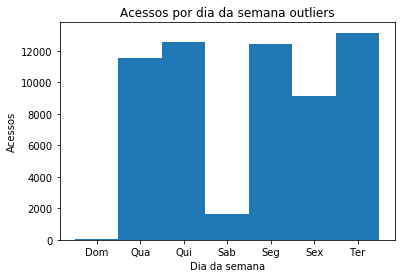

In [17]:
x = [i for i in range(8)]
plt.title("Acessos por dia da semana outliers")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df_sessao_outlier.dia_da_semana, bins = x,align="left")
plt.show()

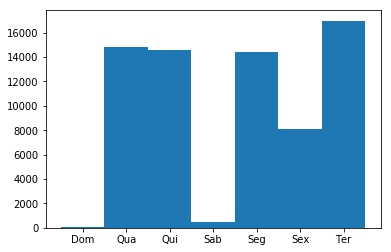

In [18]:
# x = [i for i in range(8)]
# plt.title("Acessos por dia da semana não outliers")
# plt.xlabel("Dia da semana")
# plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x,align="left")
plt.show()

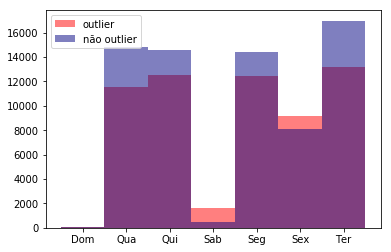

In [19]:
plt.hist(df_sessao_outlier.dia_da_semana, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper left')
plt.show()

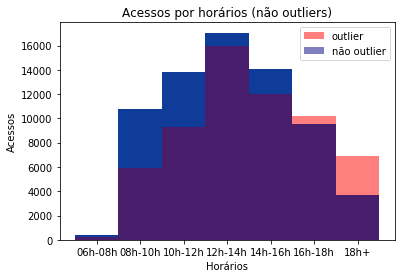

In [20]:
plt.title("Acessos por horários (não outliers)")
plt.xlabel("Horários")
plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.intervalo, bins = x,align ="left")
plt.hist(df_sessao_outlier.intervalo, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.intervalo, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper right')
plt.show()

In [24]:
def intervalo_sessao(df):
    
    from datetime import datetime
    df_sessao_outlier["duracao"] = ""
    formato = "%H:%M:%S"
    data_anterior = ""
    maquina_anterior = ""
    sessao_anterior = ""
    hora_anterior = ""
    usuario_anterior = ""

    for index, logs in df.iterrows():
        if sessao_anterior == "opened":
            if logs["sessao"] == "closed" and logs["usuario"] == usuario_anterior and logs["maquina"] == maquina_anterior and logs["data"] == data_anterior:
                df.at[index, "duracao"] = (datetime.strptime(logs["hora"],formato) - (datetime.strptime(hora_anterior,formato)))
        if logs["sessao"] == "opened":
            sessao_anterior = "opened"
            data_anterior = logs["data"]
            maquina_anterior = logs["maquina"]
            hora_anterior = logs["hora"]
            usuario_anterior = logs["usuario"]
        else:
            sessao_anterior = "closed"
            data_anterior = ""
            maquina_anterior = ""
            sessao_anterior = ""
            hora_anterior = ""
            usuario_anterior = ""
            
    return df

In [26]:
# tempo de sessao do usuario considerado outlier pelo numero de acessos
df_sessao_outlier = intervalo_sessao(df_sessao_outlier)
df_duracao_sessao_outlier = df_sessao_outlier[df_sessao_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_outlier.head()

,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,lcc2-15,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,0:00:00
7251,15/03/2016,lcc2-19,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,0:00:00
43378,17/10/2016,lcc2-05,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,0:00:03
56834,16/03/2016,lcc2-01,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,0:00:06
65646,08/08/2016,lcc2-12,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,0:00:08


In [27]:
# tempo de sessao do usuario considerado nao outlier 
df_sessao_n_outlier = intervalo_sessao(df_sessao_n_outlier)
df_duracao_sessao_n_outlier = df_sessao_n_outlier[df_sessao_n_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_n_outlier.head()


/home/livia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/livia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,data,maquina,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,lcc2-15,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,00:00:00
7251,15/03/2016,lcc2-19,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,00:00:00
43378,17/10/2016,lcc2-05,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,00:00:03
103582,27/07/2016,lcc2-40,-7446963053336319563,2016,7,27,Qua,16,tarde,16h-18h,40,False,00:00:16
87938,11/08/2016,lcc2-03,-1442416312388872333,2016,8,11,Qui,9,manha,08h-10h,3,False,00:00:36


In [75]:
# calculando o tempo de sessao para todos os usuarios
df_geral = intervalo_sessao(df_sessao)
df_geral = df_geral[df_geral.duracao != ""].sort_values(by='duracao')
df_geral.head()

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
2217,28/01/2016,12:21:09,lcc2-15,closed,-7258716506085809707,2016,1,28,Qui,12,manha,12h-14h,15,False,0:00:00
7251,15/03/2016,14:00:35,lcc2-19,closed,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,0:00:00
43378,17/10/2016,14:32:53,lcc2-05,closed,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,0:00:03
56834,16/03/2016,18:01:49,lcc2-01,closed,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,0:00:06
65646,08/08/2016,14:41:53,lcc2-12,closed,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,0:00:08


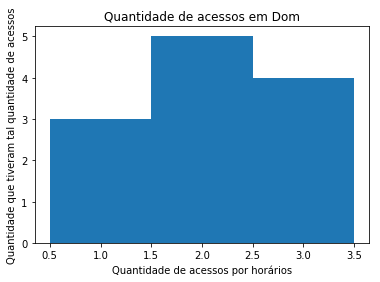

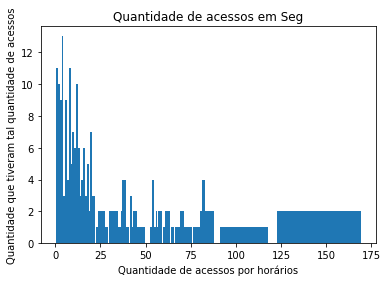

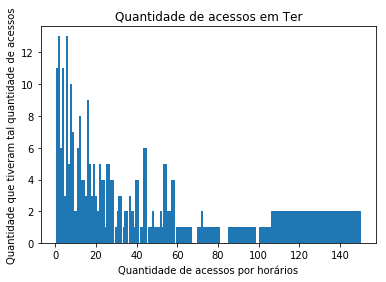

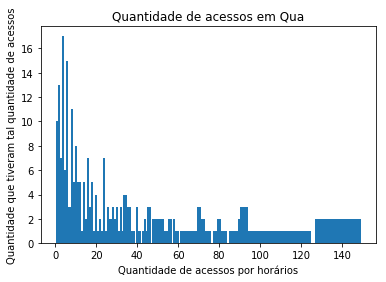

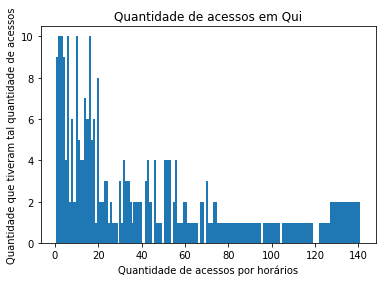

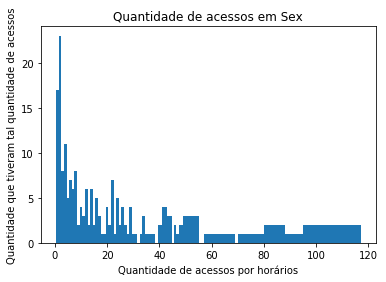

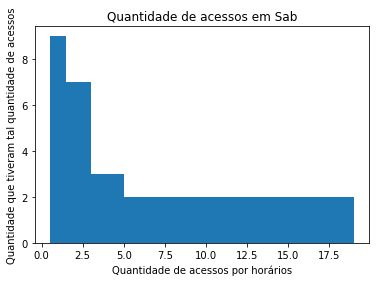

In [34]:
df_dia_semana = df_geral.groupby(['usuario','dia_da_semana']).count()
df_dia_semana.reset_index(inplace=True)
x = ['Dom','Seg','Ter','Qua','Qui','Sex','Sab']
for valor in x:
    plt.title("Quantidade de acessos em " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].maquina, bins = np.sort(df_dia_semana[df_dia_semana['dia_da_semana'] == valor].data.unique()),align="left")
    plt.show()


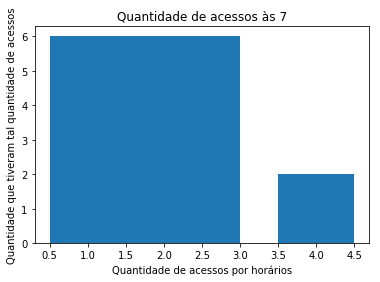

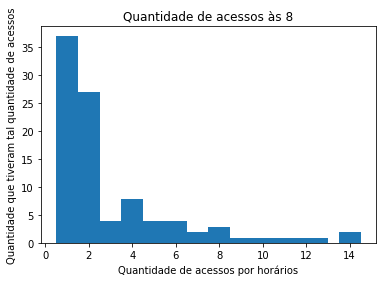

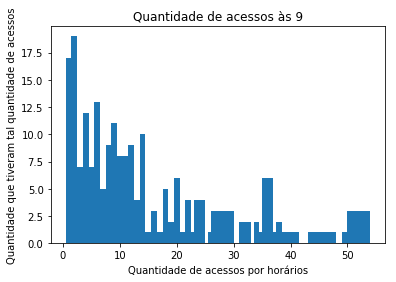

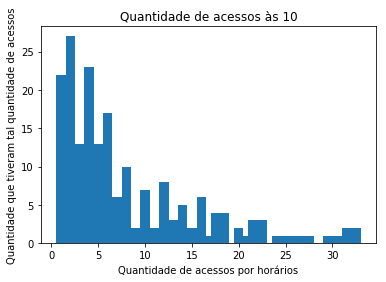

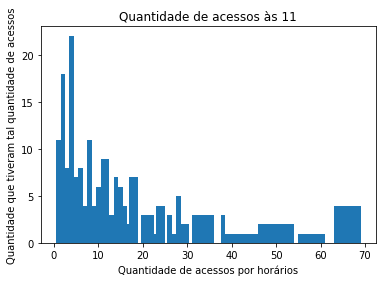

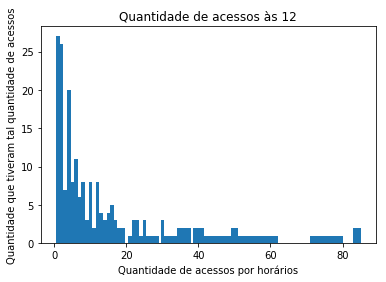

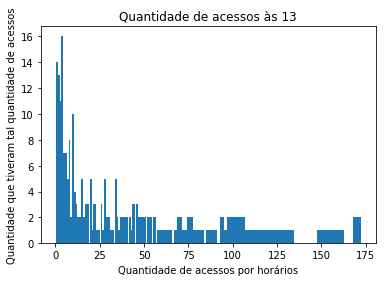

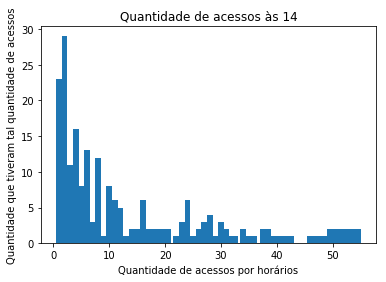

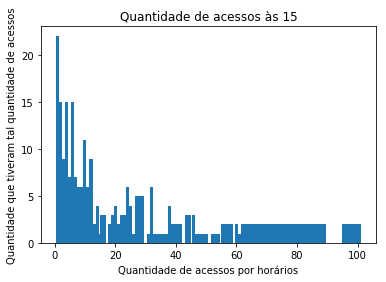

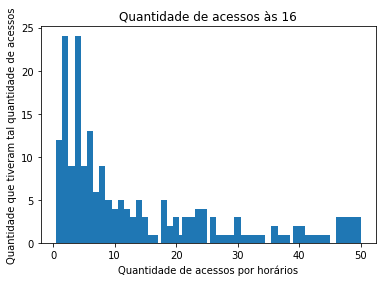

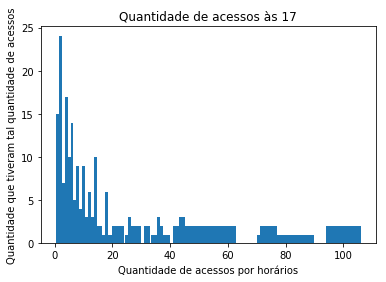

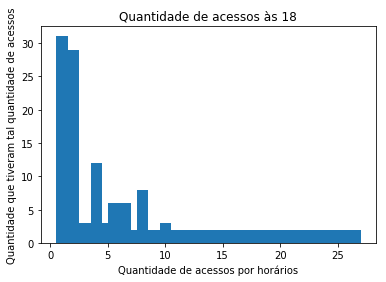

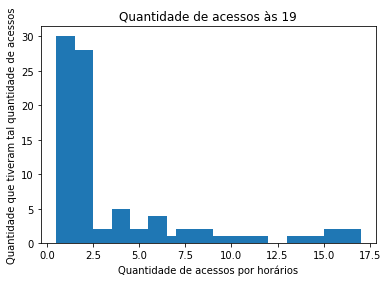

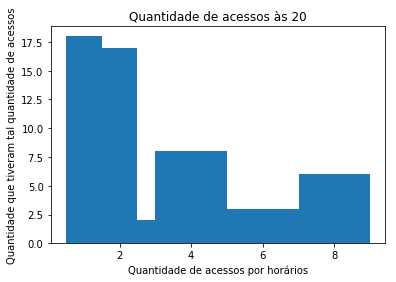

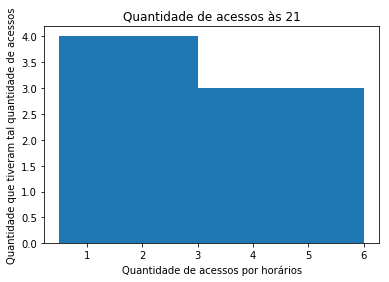

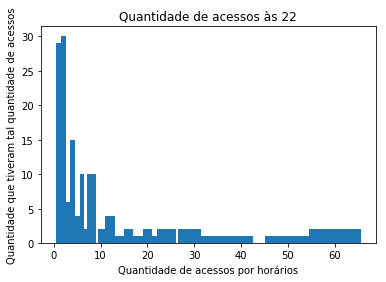

In [35]:
x = [i for i in range(7,23)]
oi = df_geral.groupby(['usuario','hora_pura']).count().reset_index()
oi['hora1'] = oi['hora_pura']

for valor in x:
    plt.title("Quantidade de acessos às " + str(valor))
    plt.xlabel("Quantidade de acessos por horários")
    plt.ylabel("Quantidade que tiveram tal quantidade de acessos")
    plt.hist(oi[oi['hora1'] == valor].maquina, bins = np.sort(oi[oi['hora1'] == valor].data.unique()),align="left")
    plt.show()



acesso por horario
7: 4-6
8: 5-14
9: 15-(<)60
10: 7-(<)35
11: 19-(<)80
12: 10 -(<)90
13: 10 - 175
14: 15 - 60
15: 15 - 110
16: 8 - 60
17: 16 - 110 (muito parecido com 15)
18: 6 - 30
19: 5 - 18
20: 5 - 10
21: 4 - 6
22: 10 - 70

In [36]:
frames = [oi[(oi.hora_pura == 7) & (oi.data > 4)], oi[(oi.hora_pura == 8) & (oi.data > 5)], 
          oi[(oi.hora_pura == 9) & (oi.data > 15)], oi[(oi.hora_pura == 10) & (oi.data > 7)],
          oi[(oi.hora_pura == 11) & (oi.data > 19)], oi[(oi.hora_pura == 12) & (oi.data > 10)], 
          oi[(oi.hora_pura == 13) & (oi.data > 10)], oi[(oi.hora_pura == 14) & (oi.data > 60)],
          oi[(oi.hora_pura == 15) & (oi.data > 15)], oi[(oi.hora_pura == 16) & (oi.data > 8)],
          oi[(oi.hora_pura == 17) & (oi.data > 16)], oi[(oi.hora_pura == 18) & (oi.data > 6)], 
          oi[(oi.hora_pura == 19) & (oi.data > 5)], oi[(oi.hora_pura == 20) & (oi.data > 5)], 
          oi[(oi.hora_pura == 21) & (oi.data > 4)], oi[(oi.hora_pura == 22) & (oi.data > 10)]]
horario_outlier = pd.concat(frames)
horario_outlier.head()

,usuario,hora_pura,data,hora,maquina,sessao,ano,mes,dia,dia_da_semana,turno,intervalo,numero_maquina,outlier,duracao,hora1
337,-3541908573582626761,7,5,5,5,5,5,5,5,5,5,5,5,5,5,7
42,-1343902712107414181,8,6,6,6,6,6,6,6,6,6,6,6,6,6,8
338,-3541908573582626761,8,7,7,7,7,7,7,7,7,7,7,7,7,7,8
388,-417527712207776877,8,10,10,10,10,10,10,10,10,10,10,10,10,10,8
488,-4959739203573668493,8,15,15,15,15,15,15,15,15,15,15,15,15,15,8


In [37]:
frames_dia_semana = [df_dia_semana[(df_dia_semana.dia_da_semana == 'Dom')],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Seg') & (df_dia_semana.sessao > 25)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Ter') & (df_dia_semana.sessao > 30)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Qua') & (df_dia_semana.sessao > 20)], # com muitas ressalvas
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Qui') & (df_dia_semana.sessao > 20)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Sex') & (df_dia_semana.sessao > 15)],
                     df_dia_semana[(df_dia_semana.dia_da_semana == 'Sab') & (df_dia_semana.sessao > 2)]]
dia_outlier = pd.concat(frames_dia_semana)
dia_outlier.head()

,usuario,dia_da_semana,data,hora,maquina,sessao,ano,mes,dia,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
41,-1543260643889497425,Dom,1,1,1,1,1,1,1,1,1,1,1,1,1
241,-4797300600735849469,Dom,4,4,4,4,4,4,4,4,4,4,4,4,4
285,-5747290438078533929,Dom,4,4,4,4,4,4,4,4,4,4,4,4,4
296,-5832552258819232989,Dom,1,1,1,1,1,1,1,1,1,1,1,1,1
307,-5878020884363930781,Dom,2,2,2,2,2,2,2,2,2,2,2,2,2


In [38]:
usuarios_outliers2 = pd.concat([dia_outlier[['usuario']], horario_outlier[['usuario']]])
usuarios_outliers2.head()

,usuario
41,-1543260643889497425
241,-4797300600735849469
285,-5747290438078533929
296,-5832552258819232989
307,-5878020884363930781


In [58]:
# df_outliers2 = df_geral[df_geral["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers2

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina,outlier,duracao
7251,15/03/2016,14:00:35,lcc2-19,closed,4447365589637111171,2016,3,15,Ter,14,tarde,14h-16h,19,False,0:00:00
43378,17/10/2016,14:32:53,lcc2-05,closed,6581201415847811223,2016,10,17,Seg,14,tarde,14h-16h,5,False,0:00:03
56834,16/03/2016,18:01:49,lcc2-01,closed,260012301744219973,2016,3,16,Qua,18,noite,18h+,1,True,0:00:06
65646,08/08/2016,14:41:53,lcc2-12,closed,5772359113678627871,2016,8,8,Seg,14,tarde,14h-16h,12,True,0:00:08
24907,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
5075,08/11/2016,15:02:23,lcc2-02,closed,6360606073874941599,2016,11,8,Ter,15,tarde,14h-16h,2,True,0:00:38
35147,09/05/2016,14:12:52,lcc2-03,closed,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,0:01:05
15297,09/05/2016,14:12:52,lcc2-03,closed,-3119048470145123191,2016,5,9,Seg,14,tarde,14h-16h,3,True,0:01:05
1312,09/05/2016,14:02:48,lcc2-05,closed,8851394046529841223,2016,5,9,Seg,14,tarde,14h-16h,5,True,0:01:06
21137,09/05/2016,14:02:48,lcc2-05,closed,8851394046529841223,2016,5,9,Seg,14,tarde,14h-16h,5,True,0:01:06


In [47]:
df_outliers2.maquina.describe()

count       24332
unique         38
top       lcc2-13
freq          926
Name: maquina, dtype: object

In [49]:
df_outliers2.turno.describe()

count     24332
unique        3
top       tarde
freq      14497
Name: turno, dtype: object

In [50]:
df_outliers2.dia_da_semana.describe()

count     24332
unique        7
top         Ter
freq       5410
Name: dia_da_semana, dtype: object

In [51]:
df_outliers2.hora_pura.describe()

count    24332.000000
mean        13.649844
std          3.016461
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         22.000000
Name: hora_pura, dtype: float64

In [52]:
outliersdf_outliers2.maquina.describe().maquina.describe()

count      172518
unique         38
top       lcc2-32
freq         7036
Name: maquina, dtype: object

In [53]:
df_outliers2.turno.describe()

count     24332
unique        3
top       tarde
freq      14497
Name: turno, dtype: object

In [54]:
df_outliers2.dia_da_semana.describe()

count     24332
unique        7
top         Ter
freq       5410
Name: dia_da_semana, dtype: object

In [55]:
df_outliers2.hora_pura.describe()

count    24332.000000
mean        13.649844
std          3.016461
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         22.000000
Name: hora_pura, dtype: float64

In [74]:
# usuarios que frequentam o lab de forma comum
df_outliers_excecoes = df_geral[~df_geral["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers_excecoes.maquina.describe(), df_outliers_excecoes.dia_da_semana.describe(), df_outliers_excecoes.hora_pura.describe()#(2237 usuarios)

(count        2237
 unique         38
 top       lcc2-05
 freq          126
 Name: maquina, dtype: object, count     2237
 unique       6
 top        Ter
 freq       592
 Name: dia_da_semana, dtype: object, count    2237.000000
 mean       13.298167
 std         3.196468
 min         7.000000
 25%        11.000000
 50%        13.000000
 75%        15.000000
 max        22.000000
 Name: hora_pura, dtype: float64)

In [73]:
# usuarios que têm muitos acessos mas frequentam o lab de comum
df_outliers_excecoes = outliers[~outliers["usuario"].isin(usuarios_outliers2["usuario"].unique())].dropna()
df_outliers_excecoes = outliers[outliers["usuario"].isin(df_outliers_excecoes["usuario"].unique())] 
df_outliers_excecoes.maquina.describe(),df_outliers_excecoes.dia_da_semana.describe(),df_outliers_excecoes.hora_pura.describe()

(count       58716
 unique         38
 top       lcc2-34
 freq         2427
 Name: maquina, dtype: object, count     58716
 unique        7
 top         Ter
 freq      13527
 Name: dia_da_semana, dtype: object, count    58716.000000
 mean        13.830166
 std          3.314630
 min          6.000000
 25%         11.000000
 50%         14.000000
 75%         16.000000
 max         22.000000
 Name: hora_pura, dtype: float64)

## K-Means

In [ ]:
df_acessos = df[["usuario","intervalo"]]
df_acessos_horarios = (df_acessos.groupby(["usuario","intervalo"]).size()).unstack().fillna(0)
X = df_acessos_horarios.values
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()
plt.show()

1 132103.10373444023
2 89455.57431722683
3 78942.63757140958
4 73092.54192167534
5 70286.91548932527
6 69180.12456715817
7 67634.87225422423
8 67874.38105370679
9 65693.74657144012
10 64934.55224284023


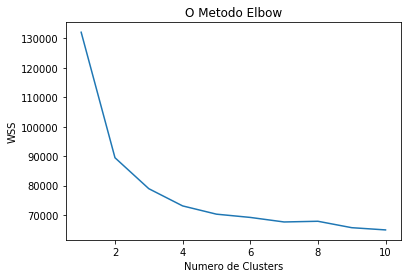

In [76]:
# kmeans por duracao de sessao
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [81]:
df_duracao = df_geral[["usuario","duracao"]]
df_acessos_duracao = (df_duracao.groupby(["usuario","duracao"]).size()).unstack().fillna(0)
X = df_acessos_duracao.values
kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(X)
wcss = []

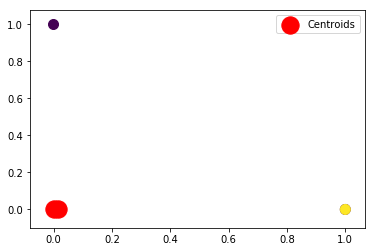

In [82]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()
plt.show()